# Polynomial Regression

In this code, I am going to show how to create a [polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression) using the [Turicreate](https://github.com/apple/turicreate) package for one single feature.

The idea is to create a *linear regression* with multiple features, but each feature is just a **power** of the investigated feature. We will need to create functions to compute the powers of the feature and also functions to find what is the the maximum power that reduces the error on the test data. The linear regression will be done using the Turicreate only, but you can try use our functions from the [linear regression](https://github.com/marceloguarido/Machine-Learning/blob/master/Linear_Regression/Linear_Regression.ipynb) file.

First, let's load used packages:

In [1]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/mguarido/anaconda2/envs/venv/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Now, load the BostonHousing.csv and save as a *sframe*.

In [2]:
data = tc.SFrame('../Data/BostonHousing.csv')

Finished parsing file /home/mguarido/OneDrive/Machine_Learning/Data/BostonHousing.csv

Parsing completed. Parsed 100 lines in 0.038637 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/mguarido/OneDrive/Machine_Learning/Data/BostonHousing.csv

Parsing completed. Parsed 21613 lines in 0.051372 secs.

For this analysis, we will only use the feature *'sqft_living'* and the output is *'price'*. So, let's sort the data into *'sqft_living'* and *'price'* for plotting purposes.

In [3]:
data = data.sort(['sqft_living', 'price'])

Now, let's create a function that receives the feature and the maximum power (2, 3, 4, or any desired value) to create a new column of sframe for each power.

In [4]:
def create_powers(feature, power = 1):
    # Power should be > 1 and, if not defined, will be 1 (will not create a polynomium)
    # Now, let's create an empty sframe
    poly_feature = tc.SFrame()
    
    # Include the input feature as "power_1"
    poly_feature['power_1'] = feature
    
    # Let's create the condition it will only run for power > 1
    if power > 1:
        # Run the loop for all the powers. Remember that the function 'range' starts from 0
        # and ends at <given number> - 1. So, define range(2, power+1)
        for pw in range(2, power+1):
            # Write the name of the column
            name = 'power' + str(pw)
            
            # Now, calculating the power of the feature and saving at the sframe
            poly_feature[name] = feature.apply(lambda x: x**pw)
            
    # Return polynomial sframe
    return poly_feature

Now, let's give a power 3 for the *'sqft_living'* and see if it works:

In [5]:
test = create_powers(data['sqft_living'], 3)
test.head()

power_1,power2,power3
290,84100,24389000
370,136900,50653000
380,144400,54872000
384,147456,56623104
390,152100,59319000
390,152100,59319000
410,168100,68921000
420,176400,74088000
420,176400,74088000
430,184900,79507000


Okay, looks good. To use the Turicreate to create a polynomial regression, we "trick" it by giving each power as an individual feature and do a linear regression with multiple features.

Now, let's create some models with different powers and see their behavior. First, a simple linear regression (do not forget to include the *'price'* in the sframe as it is the target):

In [6]:
poly1 = create_powers(data['sqft_living'], 1)
poly1['price'] = data['price']
model1 = tc.linear_regression.create(poly1, target = 'price', features = ['power_1'], verbose = False)

Let's see the coefficients of the model1.

In [7]:
model1.coefficients

name,index,value,stderr
(intercept),None,-45664.7594978,4516.74533065
power_1,None,281.674463019,1.98938522969


Now, plot the regression over the data.

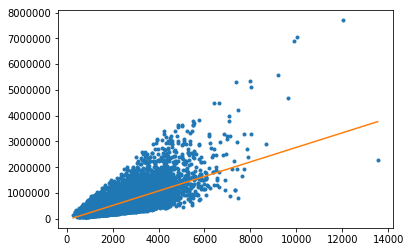

In [8]:
plt.plot(poly1['power_1'],poly1['price'],'.',
        poly1['power_1'], model1.predict(poly1),'-')

Okay, it is quite similar to the one of the linear regression code. Now, let's do the same for the power 2:

In [9]:
poly2 = create_powers(data['sqft_living'], 2)
my_features = poly2.column_names()
poly2['price'] = data['price']
model2 = tc.linear_regression.create(poly2, target = 'price', features = my_features, verbose = False)
model2.coefficients

name,index,value,stderr
(intercept),None,189694.491777,7279.54812585
power_1,None,77.2757900979,5.48240956331
power2,None,0.0365951367049,0.000936584065104


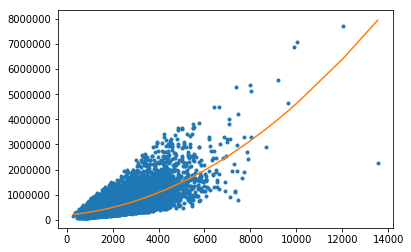

In [10]:
plt.plot(poly2['power_1'],poly2['price'],'.',
        poly2['power_1'], model2.predict(poly2),'-')

Interesting. Visually, the quadratic function looks to fit better the data. Can we make it better with a power of 3?

In [11]:
poly3 = create_powers(data['sqft_living'], 3)
my_features = poly3.column_names()
poly3['price'] = data['price']
model3 = tc.linear_regression.create(poly3, target = 'price', features = my_features, verbose = False)
model3.coefficients

name,index,value,stderr
(intercept),None,335404.184332,10935.6707068
power_1,None,-88.716992812,10.8895122408
power2,None,0.0868556331697,0.00303334681997
power3,None,-3.86506735654e-06,2.27286639742e-07


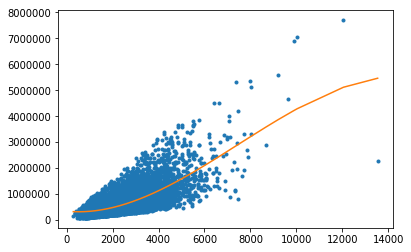

In [12]:
plt.plot(poly3['power_1'],poly3['price'],'.',
        poly3['power_1'], model3.predict(poly3),'-')

Visually, it looks even better than the power of 2. So, the higher the power, the best is the fit? Let's try the power of 7.

In [13]:
poly7 = create_powers(data['sqft_living'], 7)
my_features = poly7.column_names()
poly7['price'] = data['price']
model7 = tc.linear_regression.create(poly7, target = 'price', features = my_features, verbose = False)
model7.coefficients

name,index,value,stderr
(intercept),None,418184.320817,25487.8679058
power_1,None,-275.734155947,37.1900421675
power2,None,0.219198113606,0.0177219498721
power3,None,-3.87512508482e-05,3.46180165686e-06
power4,None,2.97228980523e-09,2.37570710388e-10
power5,None,1.2296212505e-14,3.0684562725e-15
power6,None,5.49419740792e-16,4.62162258549e-16
power7,None,-4.52915611901e-22,2.78800269836e-23


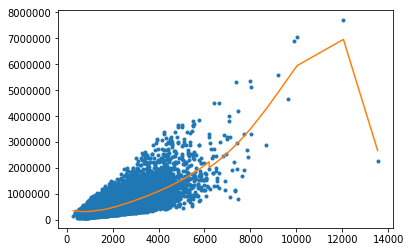

In [14]:
plt.plot(poly7['power_1'],poly7['price'],'.',
        poly7['power_1'], model7.predict(poly7),'-')

Wow, not quite good... we ended up with something called *"overfitting"*. There is an optimum power to fit the data and now we will see how to estimete it.

# Estimating the optimum power

A clever way to estimate the optimum power is to split the data into the *"test set"* and the *"train and validation set"*. The *"train and validation"* will actually consist in 2 sets (train and validation) on with we use the train set to compute the model and the validation set is used to calculate the RSS and find its minimum (it is a line search method).

First, let's split the data into the 3 cited subsets:

In [15]:
training_and_validation, test_data = data.random_split(0.8, seed=1)
train_data, validation_data = training_and_validation.random_split(0.75, seed=1)

Now, let's create a function that receives the train and validation sets, the feature, the target, and the maximum power to be "tested". For each power, a model will be created and we will choose the one with the lowest error (smaller RSS), which ic computed by:

$$RSS(w_0,w_1) = \sum_{i=1}^{N}(y_i - y_{i}^{,})^2$$

The output is the optimized power and its RSS.

In [16]:
def power_line_search(train, validation, feature, target, power=1):
    # Let's create an empty RSS vector to receive the predictions errors
    RSS = np.zeros((power,1))
    
    # As we will generate a model for each power (even 1), start a loop
    for pw in range(1,power+1):
        # First let's create the model using the training set
        poly = create_powers(train[feature], pw)
        my_features = poly.column_names()
        poly[target] = train[target]
        model = tc.linear_regression.create(poly, target = target, features = my_features, verbose = False)
        
        # Now, let's compute the RSS for the validation set
        poly_val = create_powers(validation[feature], pw)
        predictions = model.predict(poly_val)
        real_val = validation[target].to_numpy()
        RSS[pw-1] = sum(np.transpose(real_val-predictions)*(real_val-predictions))
        
    # Now, let's find the minimum RSS and its respective power
    min_RSS = min(RSS)
    min_power = RSS.argmin() + 1
    
    # Return outputs
    return (min_power, min_RSS)

Now, let's check the function by giving the maxim power of 15.

In [17]:
power, RSS = power_line_search(train_data, validation_data, 'sqft_living', 'price', 15)

In [18]:
print power
print RSS

3
[2.59344336e+14]


We could find the optimum power. Let's see its fit over the testing set.

In [19]:
poly_test = create_powers(test_data['sqft_living'], power)
my_features = poly_test.column_names()
poly_test['price'] = test_data['price']
model_test = tc.linear_regression.create(poly_test, target = 'price', features = my_features, verbose = False)
model_test.coefficients

name,index,value,stderr
(intercept),None,333358.821068,22846.8909289
power_1,None,-89.9723869711,21.9079408489
power2,None,0.0914630296076,0.00570376546159
power3,None,-5.22176892775e-06,3.67390562673e-07


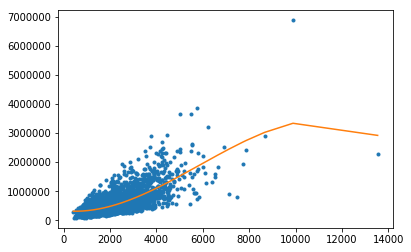

In [20]:
plt.plot(poly_test['power_1'],poly_test['price'],'.',
        poly_test['power_1'], model_test.predict(poly_test),'-')